In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First, we need to import some datasets. I need to **Salaries** dataset for data about players and their salaries, the **CollegePlaying** dataset for data about what college a player went to, and then the **Schools** dataset for data about different colleges.

In [2]:
## get datasets
salaries = pd.read_csv('./files/Salaries.csv')
schools = pd.read_csv('./files/Schools.csv')
college = pd.read_csv('./files/CollegePlaying.csv')

Now it's time to inspect them.

In [3]:
schools.head()

,schoolID,name_full,city,state,country
0,abilchrist,Abilene Christian University,Abilene,TX,USA
1,adelphi,Adelphi University,Garden City,NY,USA
2,adrianmi,Adrian College,Adrian,MI,USA
3,akron,University of Akron,Akron,OH,USA
4,alabama,University of Alabama,Tuscaloosa,AL,USA


In [4]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [5]:
college.head()

,playerID,schoolID,yearID
0,aardsda01,pennst,2001
1,aardsda01,rice,2002
2,aardsda01,rice,2003
3,abadan01,gamiddl,1992
4,abadan01,gamiddl,1993


<h1> AVERAGE SALARIES BY MOST POPULAR SCHOOL, MOST POPULAR STATE FOR COLLEGE </h1>

It looks like in order to figure out which college a player went to and which state that college is in, I need to **merge** the Salaries dataset (**salaries**) with the CollegePlaying dataset (**college**) by **playerID**.

Then I'd need to merge *again* in order to combine this new dataset, **salaries_college** with the Schools dataset (**schools**) on the **schoolID** to bring in what state the college is in, and I'll call this final dataset **salaries_college_state**

In [6]:
## bring in school to player salary DataFrame
salaries_college = pd.merge(salaries,college.iloc[:,:2], on='playerID')

## bring in college state into new DataFrame
salaries_college_state = pd.merge(salaries_college,schools[['schoolID','state','name_full']],on='schoolID')

## inspect DataFrame
salaries_college_state.head()

,yearID,teamID,lgID,playerID,salary,schoolID,state,name_full
0,1985,ATL,NL,bedrost01,550000,newhaven,CT,University of New Haven
1,1986,PHI,NL,bedrost01,650000,newhaven,CT,University of New Haven
2,1987,PHI,NL,bedrost01,1050000,newhaven,CT,University of New Haven
3,1988,PHI,NL,bedrost01,925000,newhaven,CT,University of New Haven
4,1989,PHI,NL,bedrost01,1450000,newhaven,CT,University of New Haven


Next, to see the most popular colleges in this dataset, I need to group the records by schoolID and then count how many records appear in each group.

In [7]:
## get count of schools and sort in descending order
popular_schools = salaries_college_state['schoolID'].groupby(salaries_college_state['schoolID']).value_counts().sort_values(ascending = False)

## view top 10 most popular schools
popular_schools.head(10)

schoolID   schoolID 
ucla       ucla         718
usc        usc          655
arizonast  arizonast    632
stanford   stanford     595
lsu        lsu          592
miamifl    miamifl      492
floridast  floridast    487
texas      texas        477
calstfull  calstfull    471
gatech     gatech       446
Name: schoolID, dtype: int64

But wait. Unfortunately, this is the total count of all schoolID's in the dataset, but it is not accounting for multiple records of the same player, and therefore I've got duplicate counts.

I need to group records colleges by player and *then* group them by college and count *these* values to get the counts of unique players from each college. I'm also going to start using **name_full** instead of schoolID in order to make it more digestable for readers.

I can then do this same process but for the states in which colleges are located by grouping by state after grouping by player.

In [8]:
## get unique combo of player + school to get counts of schools a player went to
grouped_salaries_college = salaries_college_state.groupby(['playerID','name_full'], as_index=False)

## do the same for player and state of college
grouped_salaries_state = salaries_college_state.groupby(['playerID','state'], as_index=False)

Now, I need to get grab out the mean career salaries of each player and also include the college and college state of those players.

In [9]:
## get mean career salary of players by college and by state
mean_salary_player_college = grouped_salaries_college.mean()[['name_full','salary','playerID']]
mean_salary_player_state = grouped_salaries_state.mean()[['state','salary','playerID']]

print('Mean Salaries by College:','\n',mean_salary_player_college.head(),'\n')
#print(type(mean_salary_player_college),'\n')
print('Mean Salaries by State:','\n',mean_salary_player_state.head())

Mean Salaries by College: 
                        name_full        salary   playerID
0  Pennsylvania State University  1.322821e+06  aardsda01
1                Rice University  1.322821e+06  aardsda01
2         Middle Georgia College  3.270000e+05   abadan01
3         University of Kentucky  2.462500e+05  abbotje01
4         University of Michigan  1.440056e+06  abbotji01 

Mean Salaries by State: 
   state        salary   playerID
0    PA  1.322821e+06  aardsda01
1    TX  1.322821e+06  aardsda01
2    GA  3.270000e+05   abadan01
3    KY  2.462500e+05  abbotje01
4    MI  1.440056e+06  abbotji01


Notice that some players went to 2 colleges. I'll ignore that for this analysis.

Now since I want to apply this data to just the most "popular" colleges and states, I need figure out which colleges and states those are

In [10]:
## find most frequent colleges + states
top_colleges = mean_salary_player_college['playerID'].groupby(mean_salary_player_college['name_full']).count().sort_values(ascending = False)
print(top_colleges.head(10),'\n')

top_states = mean_salary_player_state['playerID'].groupby(mean_salary_player_state['state']).count().sort_values(ascending = False)
print(top_states.head(10))

name_full
Arizona State University                 51
University of Southern California        44
Stanford University                      44
University of California, Los Angeles    41
University of Texas at Austin            41
Louisiana State University               40
University of Miami                      38
California State University Fullerton    34
Oklahoma State University                33
University of Arizona                    33
Name: playerID, dtype: int64 

state
CA    596
FL    275
TX    255
AZ    122
LA    103
OK    101
NC    101
IL     96
SC     81
AL     78
Name: playerID, dtype: int64


Now, I want to place these colleges and states into a list and then filter out our DataFrames of the mean salaries to just contain these colleges and state.

Also, I am going to cut down the states to just those with over 100 records (players), just because.

In [11]:
## create lists of top colleges and states
college_names = ['Arizona State University', 'University of Southern California', 'Stanford University', 
                 'University of California, Los Angeles', 'University of Texas at Austin', 'Louisiana State University',
                 'University of Miami', 'California State University Fullerton', 'Oklahoma State University', 
                 'University of Arizona']
state_names = ['CA','FL','TX','AZ','LA','OK','NC']

## get just those records from top schools and top states
top_colleges_avg_salary = mean_salary_player_college[mean_salary_player_college['name_full'].isin(college_names)][['name_full','salary']]
top_states_avg_salary = mean_salary_player_state[mean_salary_player_state['state'].isin(state_names)][['state','salary']]

print(top_colleges_avg_salary.head(10),'\n')
print(top_states_avg_salary.head(10))

                                name_full        salary
10          University of Texas at Austin  4.265000e+05
18                    Stanford University  1.478333e+05
20              Oklahoma State University  3.010000e+05
24             Louisiana State University  2.848750e+05
29                    Stanford University  2.615000e+05
39                    University of Miami  1.560000e+06
43      University of Southern California  1.700000e+05
49  University of California, Los Angeles  3.962500e+05
50                    Stanford University  1.780000e+05
51  University of California, Los Angeles  4.467000e+05 

   state        salary
1     TX  1.322821e+06
5     CA  1.295000e+05
6     FL  3.270000e+05
9     TX  4.265000e+05
10    NC  2.460000e+06
13    CA  1.805000e+05
15    TX  2.954400e+06
16    NC  3.295000e+05
17    CA  1.478333e+05
19    OK  3.010000e+05


Next, I need to group these average career salaries by college and by state and then take the mean in order to get the average career salary of all players that went to my selected colleges and went to college in my selected states.

In [12]:
# group the career salaries by college + state and inspect
print(np.array(top_colleges_avg_salary['salary'].groupby(top_colleges_avg_salary['name_full']).mean()),'\n')
print(np.array(top_states_avg_salary['salary'].groupby(top_states_avg_salary['state']).mean()),'\n')

[ 1367384.31788712  1092950.99924765  1221145.03250888   860608.77326377
  1091013.31845238   853386.00467136  1283692.32301421  1658218.56270075
  1579411.07092175   868401.947516  ] 

[ 1155620.47824875  1110263.94430724  1035668.07309999  1087084.27247566
   837998.14845935   881364.40639949  1021279.06790348] 



So I've got 10 mean career salaries by college and 10 mean career salaries by state. Now, I am going to sort these college names and state names alphabetically, grab their mean and median career salaries and place them into NumPy arrays, and then construct 3 DataFrames where the 1st column will be the college/state name, and the next 2 columns would be the mean career salary and median career salary for that college/state, respectively.

I am going to change my index from the full college name to the typical abbreviations for these colleges that one would see for during a sports broadcast in order to make them easier to plot on an axis.

In [13]:
## sort indices and create arrays of mean and median career salaries
sorted_colleges = sorted(['ASU', 'USC', 'STN','UCLA', 'UT', 'LSU','MIA', 'CAL', 'OSU','ARI'])
med_salary_college = np.array(top_colleges_avg_salary['salary'].groupby(top_colleges_avg_salary['name_full']).median())
avg_salary_college = np.array(top_colleges_avg_salary['salary'].groupby(top_colleges_avg_salary['name_full']).mean())

sorted_states = sorted(top_states_avg_salary['state'].unique())
med_salary_states = np.array(top_states_avg_salary['salary'].groupby(top_states_avg_salary['state']).median())
avg_salary_states = np.array(top_states_avg_salary['salary'].groupby(top_states_avg_salary['state']).mean())

## create DataFrames
average_career_salary_college = pd.DataFrame({
    'med_salary_college': med_salary_college,
    'avg_salary_college': avg_salary_college
}, index = sorted_colleges)

average_career_salary_state = pd.DataFrame({
    'med_salary_states': med_salary_states,
    'avg_salary_states': avg_salary_states
}, index = sorted_states)

# inspect DataFrames
print(average_career_salary_college.head(),'\n')
print(average_career_salary_state.head())

     avg_salary_college  med_salary_college
ARI        1.367384e+06       477500.000000
ASU        1.092951e+06       498125.000000
CAL        1.221145e+06       515391.666667
LSU        8.606088e+05       401000.000000
MIA        1.091013e+06       401500.000000 

    avg_salary_states  med_salary_states
AZ       1.155620e+06           434125.0
CA       1.110264e+06           463000.0
FL       1.035668e+06           414000.0
LA       1.087084e+06           440500.0
NC       8.379981e+05           490500.0


Now it's time to plot them

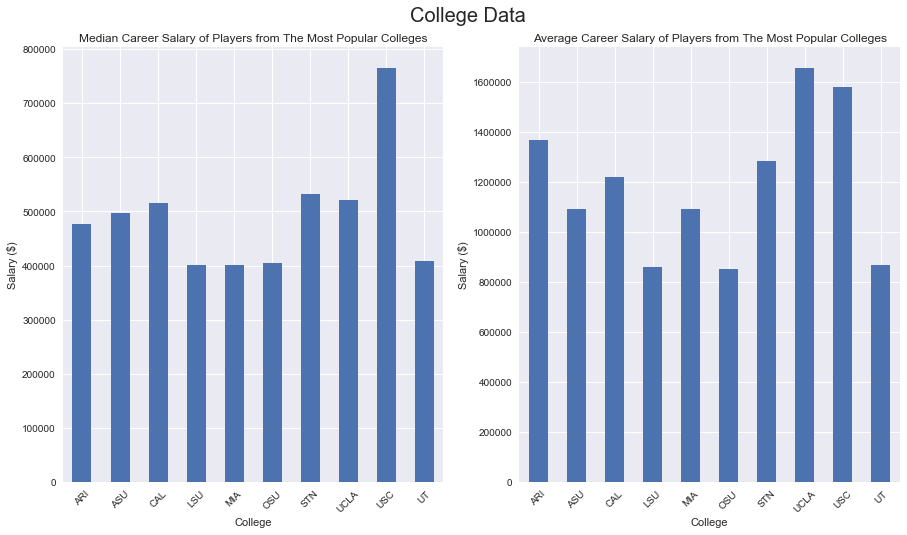

In [57]:
## test plot
%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(15,8)) 

fig.suptitle("College Data", fontsize = 20, y = 0.95)

average_career_salary_college['med_salary_college'].plot(kind = 'bar', ax = axes[0])
average_career_salary_college['avg_salary_college'].plot(kind = 'bar', ax = axes[1])

axes[0].set_title('Median Career Salary of Players from The Most Popular Colleges')
axes[0].set_xlabel('College')
axes[0].set_ylabel('Salary ($)')
axes[0].set_xticklabels(average_career_salary_college.index, rotation=45)

axes[1].set_title('Average Career Salary of Players from The Most Popular Colleges')
axes[1].set_xlabel('College')
axes[1].set_ylabel('Salary ($)')
axes[1].set_xticklabels(average_career_salary_college.index, rotation=45)

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B49102588>]], dtype=object)

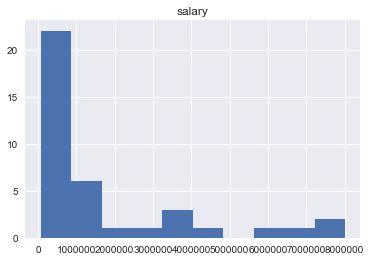

In [70]:
#ratings.hist(column = 'rating', figsize = (7,7))
top_colleges_avg_salary[top_colleges_avg_salary['name_full'] == 'University of Miami'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B46BF2978>]], dtype=object)

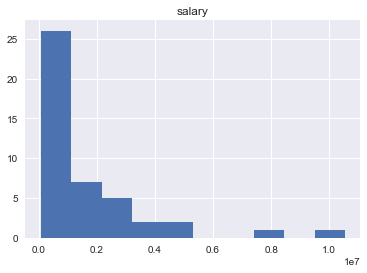

In [71]:
top_colleges_avg_salary[top_colleges_avg_salary['name_full'] == 'University of Southern California'].hist()

So we can see that players that went to University of Southern California had the highest median salary (~ 1.5x more than most other colleges), as well as the second highest average salary. This indicates that this could possible be a good choise of school for a player to earn a lot of money in the pros.

The average salaries were a lot more varied among colleges, with UCLA being to college with the highest overall salary and Oklahoma State University being the lowest, with the University of Miami and University of Texas - Austin not far behind.

I'd assume these distributions would not be too normal, so the median would be the better bar plot to take note of.

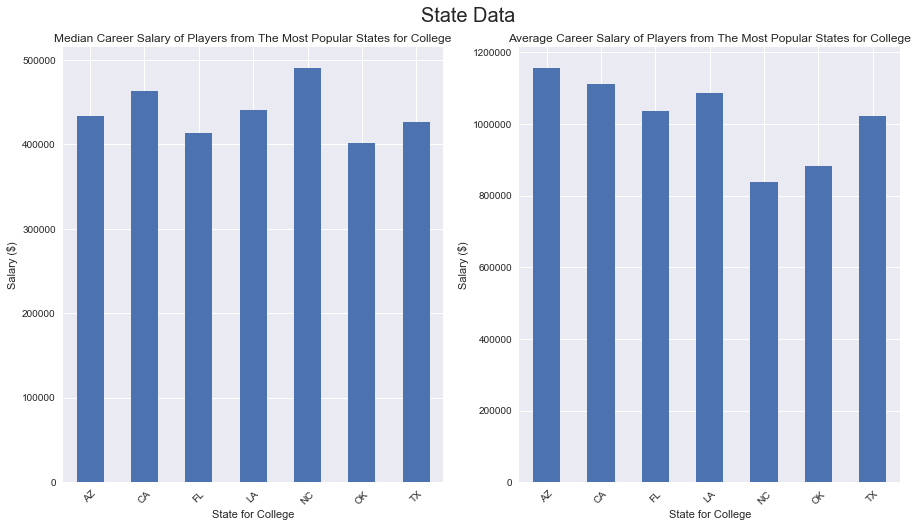

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(15,8)) 

fig.suptitle("State Data", fontsize = 20, y = 0.95)

average_career_salary_state['med_salary_states'].plot(kind = 'bar', ax = axes[0])
average_career_salary_state['avg_salary_states'].plot(kind = 'bar', ax = axes[1])

axes[0].set_title('Median Career Salary of Players from The Most Popular States for College')
axes[0].set_xlabel('State for College')
axes[0].set_ylabel('Salary ($)')
axes[0].set_xticklabels(average_career_salary_state.index, rotation=45)
    
axes[1].set_title('Average Career Salary of Players from The Most Popular States for College')
axes[1].set_xlabel('State for College')
axes[1].set_ylabel('Salary ($)')
axes[1].set_xticklabels(average_career_salary_state.index, rotation=45)

plt.show()

It looks like this dataset doesn't give an indication of the best state to go to college in in order bring up one's chances to make a higher career salary.

North Carolina has the highest median career salary, followed by California and Arizona. But, Arizona has the highest average career salary, followed by California and Louisiana.

So maybe Arizona and California are the states one would want to look at to play for in college in order to bolster their chances at making a greater salary over their career in the pros. From the college analysis earlier, it looks like USC could be the overall best best in this case.

In [16]:
import folium # conda install -c ioos folium=0.2.1 

state_geo = 'C:/folium-master/examples/data/us-states.json' # from w/in folium package

# Setup a folium map at a high-level zoom @Alok (100,0) are NOT lat long coordinates
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# use built-in method "choropleth" for choropleth maps that bind Pandas Data Frames and json geometries together.  
# This allows us to quickly visualize data combinations

plot_data = average_career_salary_state['med_salary_states']

map.choropleth(geo_path = state_geo, data = plot_data,
               columns = ['StateCode','Value'],
               key_on = 'feature.id',  # refers to label in the JSON object that has country code as the feature ID
               fill_color = 'YlGnBu', fill_opacity = 0.7,
               line_opacity = 0.2,
              # legend_name = legend_label
              )

# Create Folium plot
map.save('plot_data.html')

# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data.html width=700 height=450></iframe>')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/folium-master/examples/data/us-states.json'

In [17]:
## group dataframe by team, check mean salary of each

grouped_salaries_team = salaries_college_state.groupby(['teamID'], as_index=False)
grouped_salaries_team['salary'].mean().head()

,teamID,salary
0,ANA,1.941196e+06
1,ARI,2.669340e+06
2,ATL,1.677754e+06
3,BAL,1.998160e+06
4,BOS,2.503153e+06


In [18]:
team_avg_salary = grouped_salaries_team['salary'].mean()
team_med_salary = grouped_salaries_team['salary'].median()

print(team_avg_salary.head())
print(team_med_salary.head())

  teamID        salary
0    ANA  1.941196e+06
1    ARI  2.669340e+06
2    ATL  1.677754e+06
3    BAL  1.998160e+06
4    BOS  2.503153e+06
  teamID   salary
0    ANA   500000
1    ARI  1350000
2    ATL   515000
3    BAL   750000
4    BOS   805000


In [19]:
## create DataFrames of average and median salaries by team
team_avg_salary = grouped_salaries_team['salary'].mean()
team_med_salary = grouped_salaries_team['salary'].median()

print(team_avg_salary.head())
print(team_med_salary.head())

  teamID        salary
0    ANA  1.941196e+06
1    ARI  2.669340e+06
2    ATL  1.677754e+06
3    BAL  1.998160e+06
4    BOS  2.503153e+06
  teamID   salary
0    ANA   500000
1    ARI  1350000
2    ATL   515000
3    BAL   750000
4    BOS   805000


In [20]:
## put the DataFrame into list for the index and arrays for the data
sorted_teams = sorted(team_avg_salary['teamID'].unique())
avg_team_salary = np.array(team_avg_salary['salary'])
med_team_salary = np.array(team_med_salary['salary'])

print(sorted_teams[:5])
print(avg_team_salary[:5])
print(med_team_salary[:5])

['ANA', 'ARI', 'ATL', 'BAL', 'BOS']
[ 1941196.01318267  2669339.82803943  1677753.94720169  1998159.68257411
  2503152.63230994]
[ 500000 1350000  515000  750000  805000]


In [21]:
## create new DataFrame with both arrays as columns
average_team_salary_df = pd.DataFrame({
    'med_salary': med_team_salary,
    'avg_salary': avg_team_salary
}, index = sorted_teams)

average_team_salary_df.head()

,avg_salary,med_salary
ANA,1.941196e+06,500000
ARI,2.669340e+06,1350000
ATL,1.677754e+06,515000
BAL,1.998160e+06,750000
BOS,2.503153e+06,805000


In [22]:
## Create 2 new DataFrames, sorted by respective columns
sorted_avg_salary = average_team_salary_df.sort_values(by='avg_salary', ascending=False)
sorted_med_salary = average_team_salary_df.sort_values(by='med_salary', ascending=False)

print(sorted_avg_salary.head(),'\n')
print(sorted_med_salary.head())

       avg_salary  med_salary
NYY  1.381071e+07    13500000
SFG  9.518590e+06     9000000
WSN  6.898691e+06     4000000
CHC  6.358333e+06     2500000
NYM  5.871053e+06     4325000 

       avg_salary  med_salary
NYY  1.381071e+07    13500000
SFG  9.518590e+06     9000000
KCR  5.412500e+06     5500000
LAD  4.831629e+06     4500000
NYM  5.871053e+06     4325000


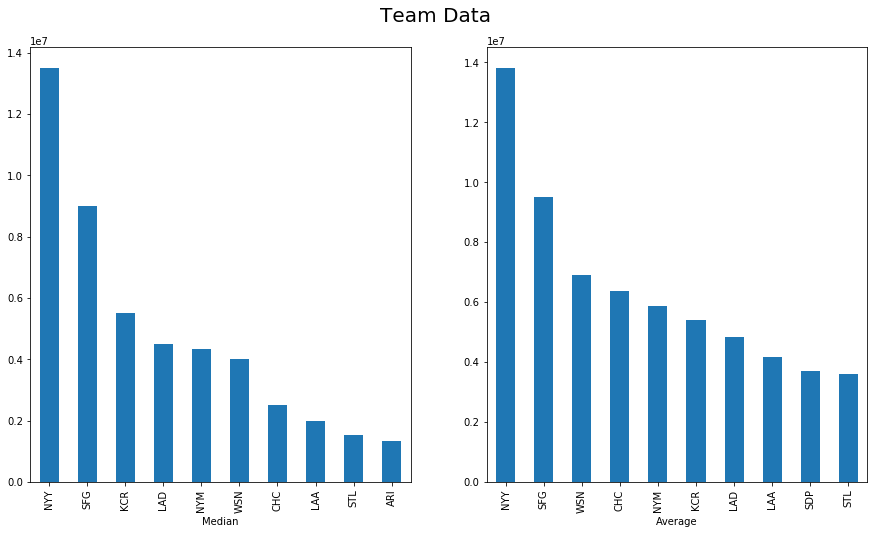

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15,8)) 

fig.suptitle("Team Data", fontsize = 20, y = 0.95)

sorted_avg_salary['avg_salary'].head(10).plot(kind = 'bar', ax = axes[1])
sorted_med_salary['med_salary'].head(10).plot(kind = 'bar', ax = axes[0])

axes[0].set_xlabel('Median')
#axes[0].set_xticks()

axes[1].set_xlabel('Average')
#axes[1].set_xticks(rotation=45)

plt.show()